In [1]:
from models import neural_network as nn
from models import model as md
import utils as ut
import numpy as np
# Plot results
import matplotlib.pyplot as plt

In [2]:
# Global Variables
samples = 1000
seed = 42
batch_size = 32
epochs = 30000
learning_rate = 0.01

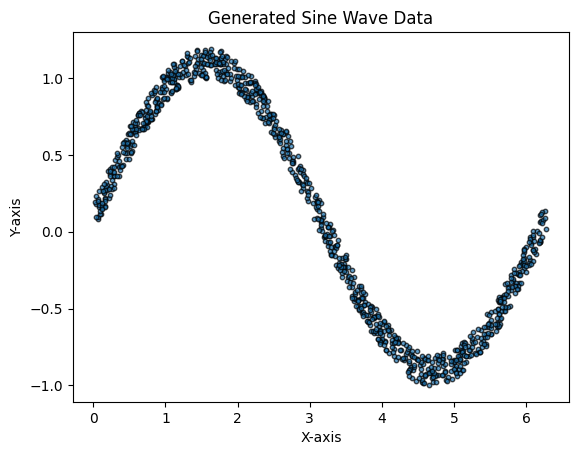

In [3]:
# Create DataSet
sin_wave = ut.SinData(samples, seed, batch_size)
x_values, y_values = sin_wave.x_values.reshape(-1, 1), sin_wave.y_values.reshape(-1, 1)
colors = np.random.rand(1000)

plt.title('Generated Sine Wave Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.scatter(sin_wave.x_values,
            sin_wave.y_values,
            s=10,
            alpha=0.7,
            edgecolors='k')
plt.show()

In [4]:
# Model parameters
learning_rate = 0.01
epochs = 100000

# Create the model
model = md.Model()

# Add layers
model.add(nn.DenseLayer(1, 16))
model.add(nn.ActivationReLU())
model.add(nn.DenseLayer(16, 16))
model.add(nn.ActivationReLU())
model.add(nn.DenseLayer(16, 1))
model.add(nn.ActivationLinear())

# Compile the model
model.compile(loss=nn.LossMeanSquareError(), optimizer=nn.Optimizer_SGD(learning_rate=learning_rate))

In [5]:
# Train the model
model.fit(x_values, y_values, epochs=epochs) 

Epoch: 0, Loss: 0.5154123279405042
Epoch: 100, Loss: 0.46691592223937517
Epoch: 200, Loss: 0.37729056059887717
Epoch: 300, Loss: 0.2510898703291069
Epoch: 400, Loss: 0.1882816693464331
Epoch: 500, Loss: 0.16607304871927317
Epoch: 600, Loss: 0.15772619201381366
Epoch: 700, Loss: 0.1535767679883099
Epoch: 800, Loss: 0.15109985082193697
Epoch: 900, Loss: 0.14949892748656082
Epoch: 1000, Loss: 0.1483105006814616
Epoch: 1100, Loss: 0.1473347932568256
Epoch: 1200, Loss: 0.14645693795848247
Epoch: 1300, Loss: 0.14557521282775673
Epoch: 1400, Loss: 0.14469009802927885
Epoch: 1500, Loss: 0.14377856142515164
Epoch: 1600, Loss: 0.14283393768867972
Epoch: 1700, Loss: 0.1418312423446332
Epoch: 1800, Loss: 0.14076624545874303
Epoch: 1900, Loss: 0.13964559260701312
Epoch: 2000, Loss: 0.13845144074188015
Epoch: 2100, Loss: 0.13719793257818394
Epoch: 2200, Loss: 0.13587486011882924
Epoch: 2300, Loss: 0.13449612735688812
Epoch: 2400, Loss: 0.13304735475141116
Epoch: 2500, Loss: 0.13152336057105873
Epoch

In [6]:
model.info()

Model Information:
Number of layers: 6

Layer 1:
  Type: DenseLayer
  Number of neurons: 16
  Weights shape: (1, 16)
  Biases shape: (1, 16)
  Weights: [[ 0.51018134  0.32456432 -0.08135438 -0.19355847 -0.06642242  0.65506621
  -0.04285    -0.08204681  0.2985656   0.07719756 -0.13883901 -0.02172837
  -0.04972676 -0.06409043 -0.10170367  0.52341784]]
  Biases: [[-0.5076944  -0.46636763  0.          0.          0.          0.34462463
   0.          0.         -0.73090498 -0.41865463  0.          0.
   0.          0.          0.         -0.9967713 ]]

Layer 2:
ActivationReLU

Layer 3:
  Type: DenseLayer
  Number of neurons: 16
  Weights shape: (16, 16)
  Biases shape: (1, 16)
  Weights: [[-7.65460158e-02 -1.99494529e-01  3.23191348e-02  2.18596126e-01
  -1.26855392e-01 -5.64747618e-02 -2.49519163e-01 -4.77646018e-01
   1.10685018e-01 -1.14059172e-02  5.55700762e-02 -9.68831632e-02
  -3.37138153e-01  2.39071486e-01 -8.05605398e-02 -1.74373720e-01]
 [-7.46403148e-02 -3.21662515e-02  2.27074

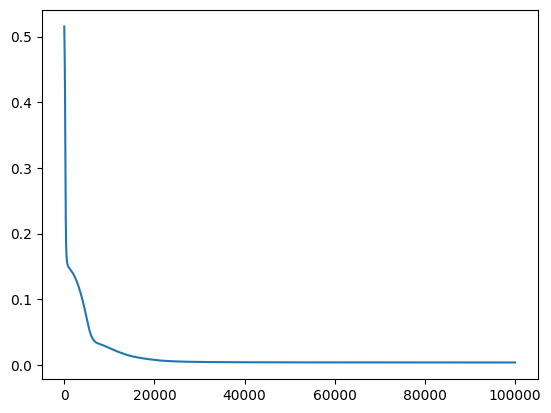

In [7]:
plt.plot(model.loss_history)

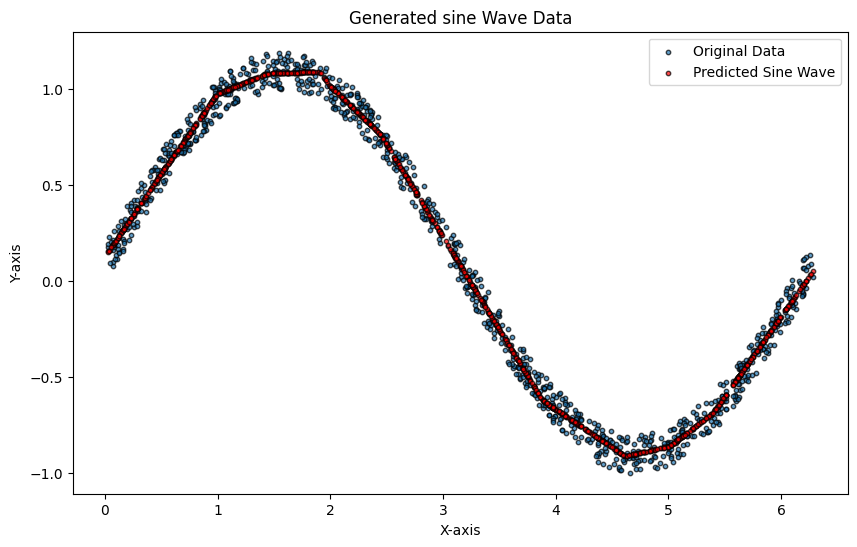

In [8]:
# Get predictions
predictions = model.predict(x_values)

# Create the plot
plt.figure(figsize=(10, 6))
plt.title('Generated sine Wave Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Scatter plot of original data
plt.scatter(
    x_values,
    y_values,
    s=10,
    alpha=0.7,
    edgecolors='k',
    label='Original Data'
    )

plt.scatter(
    x_values,
    predictions,
    s=10,
    color='r',
    alpha=0.7,
    edgecolors='k',
    label='Predicted Sine Wave'
)

plt.legend()
plt.show()

In [9]:
# Save the weights and biases
model.save_weights('model_weights.npz')

Weights and biases saved to model_weights.npz
